# **SpaceX  Falcon 9 First Stage Landing Prediction**


### Part-3: Exploring and Preparing Data


In this section of the project, 
 we will perform Exploratory Data Analysis and Feature Engineering.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [3]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


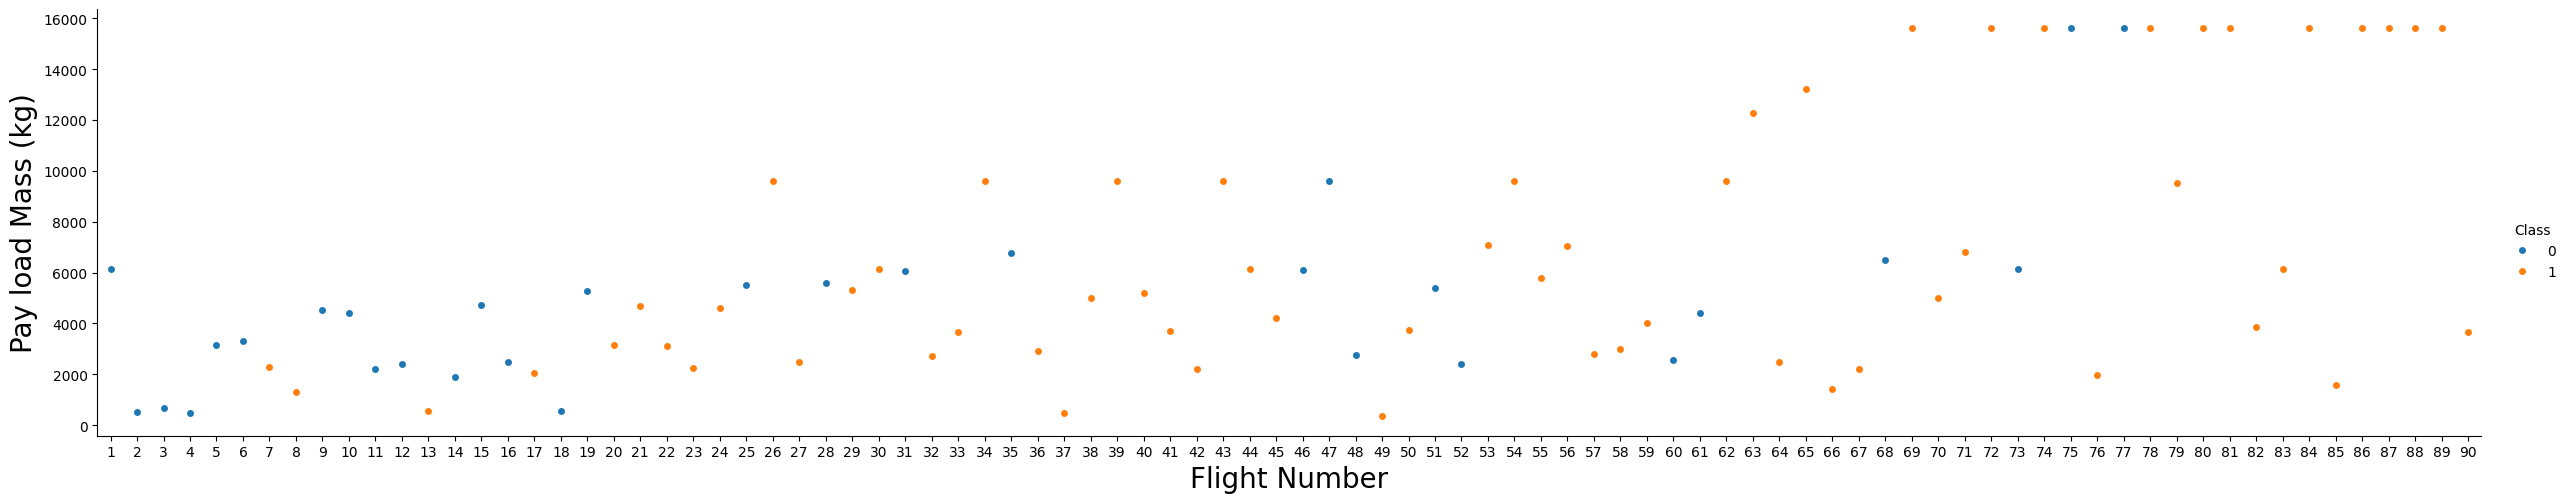

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


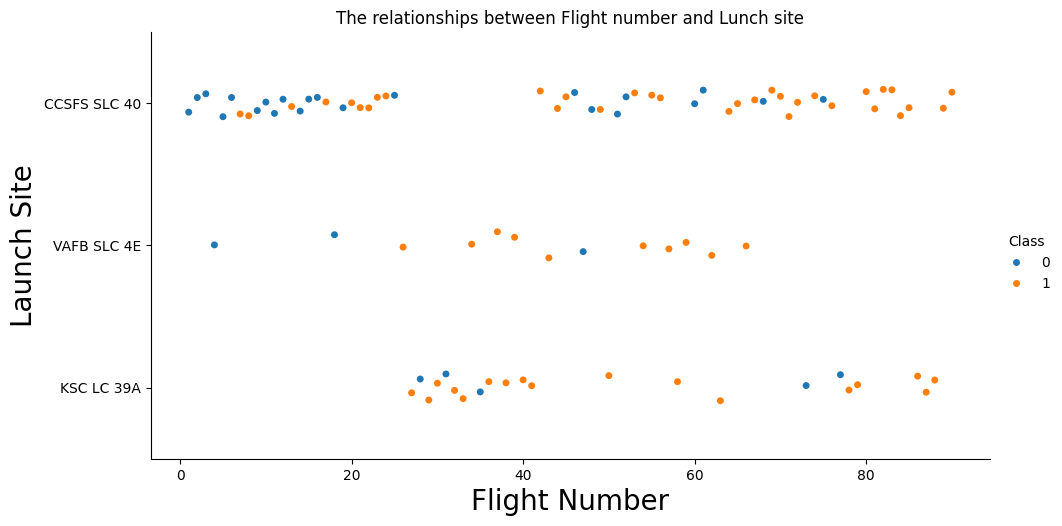

In [6]:
 # Plot a scatter point chart with x-axis as Flight Number and y-axis as the launch site, and hue as the Class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("The relationships between Flight number and Lunch site")
plt.show()

From the above scatter plot what we can see that: 
1.  Most of the flights were attempted in CCSFS SLC 40 launch site.
2. At the begining time of the launch time, most of the attempts were unsuccesful.

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


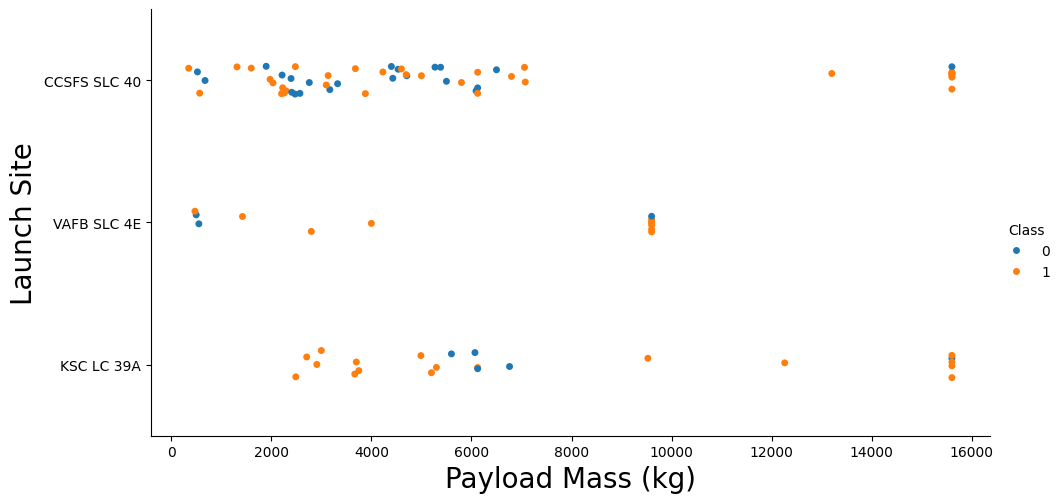

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

From the above scatter plot what we can see is that: 
1. For the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).
2. There are not many flights attempts with the heavy payload mass.


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


#### Note:  Pandas series: 
A pandas Series is a one-dimensional labeled array that can hold data of various types, such as integers, floats, strings, or even more complex objects. It is a fundamental data structure in pandas, a popular data manipulation library in Python. Series can be thought of as a single column of data in a table or spreadsheet.

Key characteristics of a pandas Series include:

Labels (Index): Each element in a Series is associated with a label or an index. This index can be explicitly defined or automatically generated (starting from 0 by default).

Homogeneous Data: A Series typically contains elements of the same data type. For example, you can have a Series of integers, a Series of strings, or a Series of floating-point numbers.

Size and Shape: A Series has a fixed size, which is determined by the number of elements it contains. The shape of a Series is one-dimensional, unlike a DataFrame, which is a two-dimensional data structure.

Data Operations: You can perform various data operations on a Series, such as arithmetic operations, filtering, aggregation, and more.

 

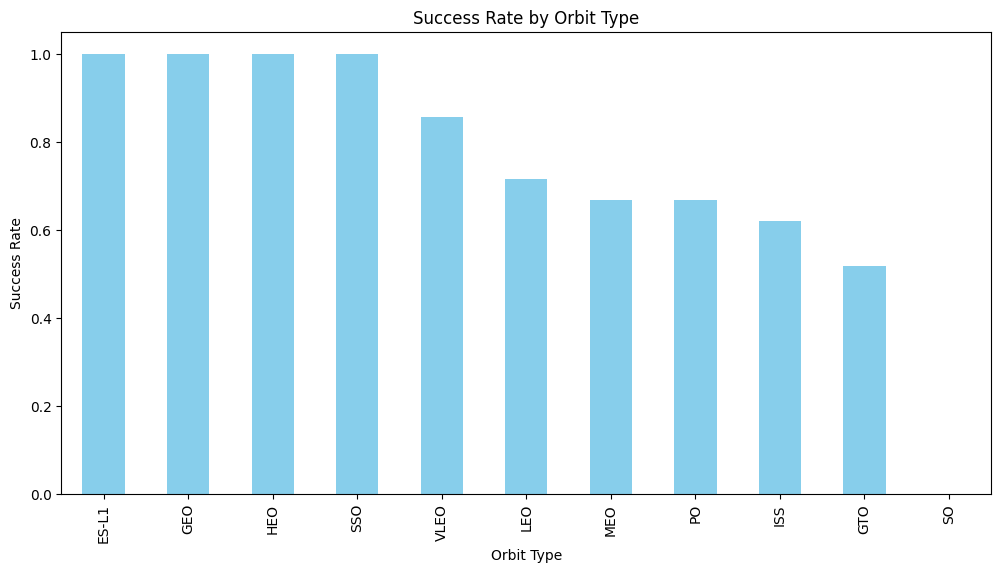

In [22]:
# HINT use groupby method on Orbit column and get the mean of Class column

import pandas as pd
import matplotlib.pyplot as plt

# Your data manipulation code
success_rate = df.groupby("Orbit")['Class'].mean().sort_values(ascending=False) # series containing orbit type and mean

# Let's create a barplot
plt.figure(figsize=(12, 6))  # figure canvas
success_rate.plot(kind="bar", color="skyblue")
plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=90)
plt.show()



From the above bar plot we can see that: 
1. ES-L1 (Earth-Sun L1), GEO (Geostationary Earth Orbit), HEO (Highly Elliptical Orbit), and SSO (Sun-Synchronous Orbit) has the highest success rate .This might because of several factors including clear objective of spaceX team or orbits like ES-L1, GEO, and HEO are relatively close to Earth, which means that launches to these orbits are less demanding in terms of energy and propulsion. 
2. Similarly, SO orbit has the least success rate , it seems like its more challanging to send Falcon 9 into the orbits who are far from our earth.





### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


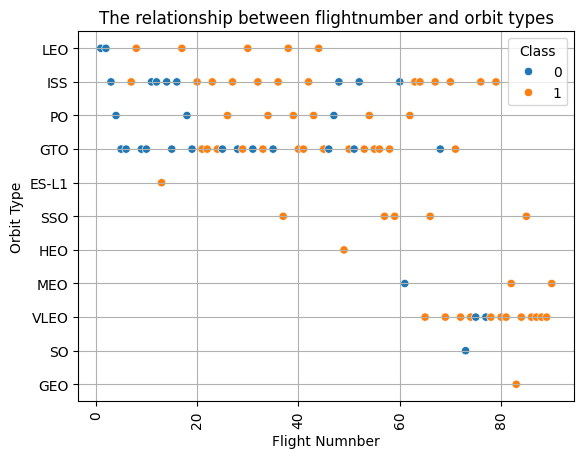

In [28]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# we can not use plot funtion for scatter plot 
# let's use sns 
sns.scatterplot(x="FlightNumber", y="Orbit", data=df, hue="Class")
plt.title("The relationship between flightnumber and orbit types")
plt.xlabel("Flight Numnber")
plt.ylabel("Orbit Type")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

From the above scatter plot we can see that:
1.  In the LEO orbit the Success appears related to the number of flights, on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


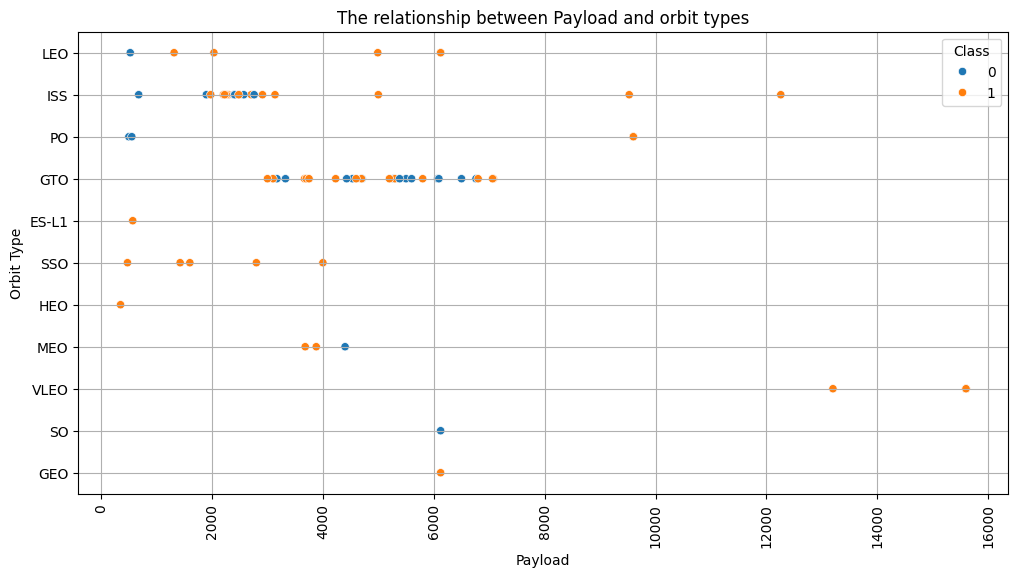

In [29]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PayloadMass", y="Orbit", data=df, hue="Class")
plt.title("The relationship between Payload and orbit types")
plt.xlabel("Payload" )
plt.ylabel("Orbit Type")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

From the above scatterplot we can see that : 
1. With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   
2.. However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.
3. Between 3500 kg to 6500 kg payload, most of the attempts were made for GTO orbit




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


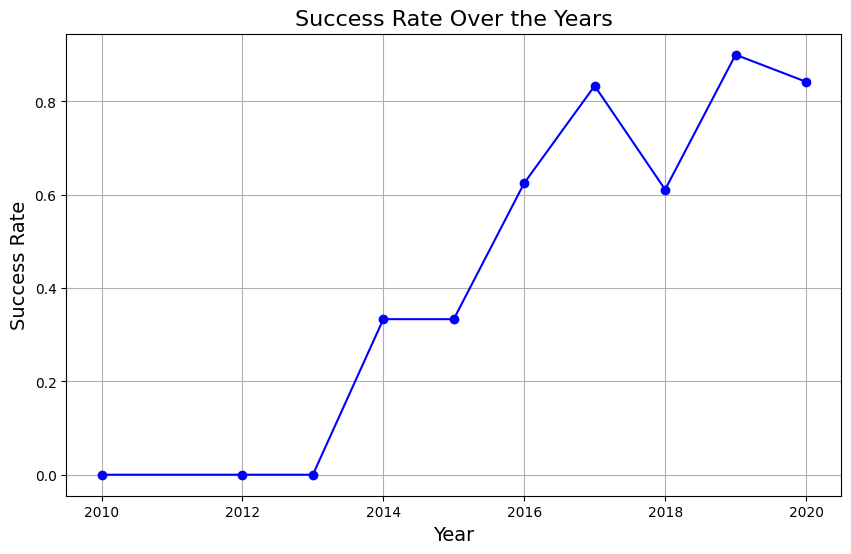

In [33]:

# A function to Extract years from the date
year = []  # Define the year list
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Call the function to extract years
year = Extract_year(df["Date"])

# Add the 'year' list as a new column in the DataFrame
df['Year'] = year

# Calculate the success rate for each year
yearly_success_rate = df.groupby(year)['Class'].mean()

# Convert the index (years) and values (success rates) to numeric
yearly_success_rate.index = yearly_success_rate.index.astype(int)
yearly_success_rate = yearly_success_rate.astype(float)

# using matplotlb.pyplot module yearly_success_rate.plot(kind="line")
# plt.show()
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-', color='b')

# Set the labels and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate Over the Years", fontsize=16)

# Show the plot
plt.grid(True)
plt.show()


From the above line chart what we can see is that: 
1. The success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [34]:
# create a new dataframe for the most important features that effects success rate
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


#### What is OneHotEncoder?
One-hot encoding is a technique used to represent categorical data as binary values in a machine learning model. It is essential because many machine learning algorithms work with numerical data, and categorical variables need to be converted into a numerical format for these algorithms to make meaningful predictions. Here's why one-hot encoding is necessary and how it works:

Numerical Representation: Machine learning algorithms operate on numerical values, not on categories or labels. Categorical variables, like "Orbit," "LaunchSite," "LandingPad," and "Serial," contain non-numeric values that need to be transformed into a numeric format.

In [36]:
#  get_dummies() function on the categorical columns
# Create dummy variables for categorical columns
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Display the first few rows of the resulting DataFrame
features_one_hot.head()

 

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


### Note: Why casting to float64 instead of int32?
You can use integer encoding for one-hot encoding, and in many cases, it's a valid approach. However, using floating-point encoding (e.g., 'float64') instead of integers has some advantages in certain scenarios:

Compatibility: When you use 'float64' encoding, it's compatible with a broader range of machine learning libraries and functions that expect or require floating-point values. While many machine learning models can work with both integers and floats, some libraries may expect or work more efficiently with floating-point data.

Flexibility: Using 'float64' allows you to represent missing values, NaN (Not-a-Number), and other special values that can be meaningful in some machine learning contexts. With integer encoding, you may need to handle missing values differently.

Consistency: If your dataset contains both continuous and one-hot encoded categorical features, using 'float64' for all features can simplify data handling, preprocessing, and interactions between features.

Precision: Depending on the scale and magnitude of your data, floating-point numbers with a high precision (e.g., 'float64') can better represent decimal values or small variations in data. This can be important when working with numerical features

In [15]:

features_one_hot = features_one_hot.astype('float64')
features_one_hot.shape



(90, 76)

Now, Let's export newly created dataframe into csv file.

In [37]:
features_one_hot.to_csv('features_one_hot.csv', index=False)


### Conclusion: 
In this section of the project, 
1. We performed EDA by using visulizations libraries such as Matplotlib, seaborn to extract the meaningful insights from the data. 
3. We found the most important features that could effect the success rate of Falcon 9 such as 'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', and 'Flights'.
4. We did feature engineering by selecting the most important features in a new dataframe and converting categorical columns into numeric ones using one hot encoding techniques using get_dummies() method
5. Finally, exported data into new csv file for mechine learning training.